<a href="https://colab.research.google.com/github/maxschebek/fastai_train/blob/main/classify_physicists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
!pip install fastai==2.0.19
!pip install fastai2==0.0.30
!pip install fastcore==1.3.1
!pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *

In [4]:
import os
key = os.environ.get('AZURE_SEARCH_KEY','XXX')

In [5]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
# Search 150 images of Einstein with Bing image search
results = search_images_bing(key,'einstein')
ims = results.attrgot('contentUrl')
len(ims)

150

In [13]:
# Save one
dest = 'data/einstein.jpg'
download_url(ims[0], dest)

Path('data/einstein.jpg')

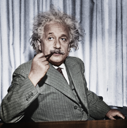

In [14]:
im = Image.open(dest)
im.to_thumb(128)

In [15]:
physicist_names = 'einstein', 'feynman', 'hawking'
path = Path('data/physicists')

In [17]:
# Download 150 images each and save to directory named after physicist
if not path.exists():
  path.mkdir()
  for pname in physicist_names:
    dest = path/pname
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key,pname)
    download_images(dest,urls=results.attrgot('contentUrl'))

In [44]:
fns = get_image_files(path)
fns

(#432) [Path('data/physicists/hawking/00000099.jpg'),Path('data/physicists/hawking/00000098.jpg'),Path('data/physicists/hawking/00000105.png'),Path('data/physicists/hawking/00000129.jpg'),Path('data/physicists/hawking/00000132.jpg'),Path('data/physicists/hawking/00000006.png'),Path('data/physicists/hawking/00000146.jpg'),Path('data/physicists/hawking/00000042.jpg'),Path('data/physicists/hawking/00000113.jpg'),Path('data/physicists/hawking/00000116.JPG')...]

In [45]:
# Find images which cannot be opened and unlink
failed_figs = verify_images(fns)
failed_figs.map(Path.unlink)

(#0) []

In [46]:
# Create datablock
physicists = DataBlock(
        blocks = (ImageBlock,CategoryBlock),
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))



In [47]:
# Create dataloaders from datablock
dls = physicists.dataloaders(path)

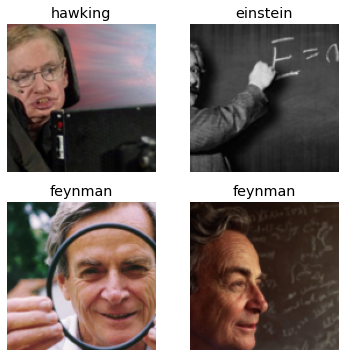

In [48]:
dls.valid.show_batch(max_n = 4, nrows = 2)

In [49]:
# Resize and Crop randomly 
physicists = physicists.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = physicists.dataloaders(path)



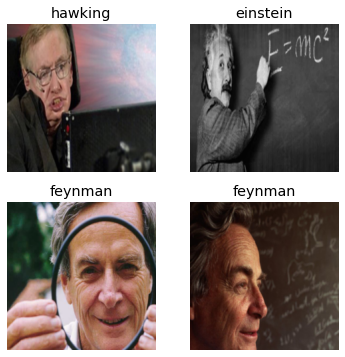

In [32]:
dls.valid.show_batch(max_n = 4, nrows = 2)

In [50]:
# Create a model and train
learn = cnn_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.405853,0.836270,0.313953,00:13


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.556121,0.395558,0.162791,00:14
1,0.400640,0.170879,0.081395,00:13
2,0.294543,0.111826,0.058140,00:14
3,0.238094,0.098816,0.046512,00:13


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

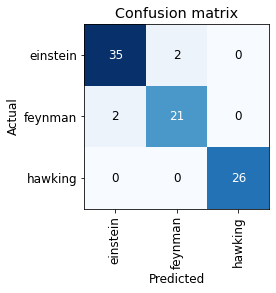

In [51]:
# Check confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


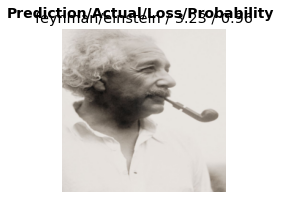

In [56]:
 #Show instance with highest loss
interp.plot_top_losses(1)

In [58]:
# Clean data, remove unwanted
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [61]:
# Export the model to a pickle file and check that it worked
learn.export(fname='learn_physicists.pkl')
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('learn_physicists.pkl')]

In [62]:
# Load the trained model
learn_inf = load_learner(path/'learn_physicists.pkl')


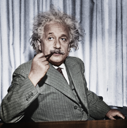

In [66]:
dest = 'data/einstein.jpg'
im = Image.open(dest)
im.to_thumb(128)

In [67]:
learn_inf.predict(dest)


('einstein', TensorBase(0), TensorBase([9.8752e-01, 4.1770e-04, 1.2058e-02]))